<a href="https://colab.research.google.com/github/sudheervobili/Pytorch/blob/main/ann_fashion_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fashionmnist


In [8]:
# Upload kaggle.json
from google.colab import files
files.upload()  # Select Kaggle (3).json

# Configure Kaggle CLI
!mkdir -p ~/.kaggle
!cp "Kaggle (3).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle CLI
!pip install -q kaggle

# Download Dataset
!kaggle datasets download -d zalando-research/fashionmnist

# Unzip Dataset
!unzip fashionmnist.zip


Saving Kaggle (3).json to Kaggle (3) (1).json
Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
  0% 0.00/68.8M [00:00<?, ?B/s]
100% 68.8M/68.8M [00:00<00:00, 1.06GB/s]
Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [9]:
df = pd.read_csv('fashion-mnist_train.csv')

In [10]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


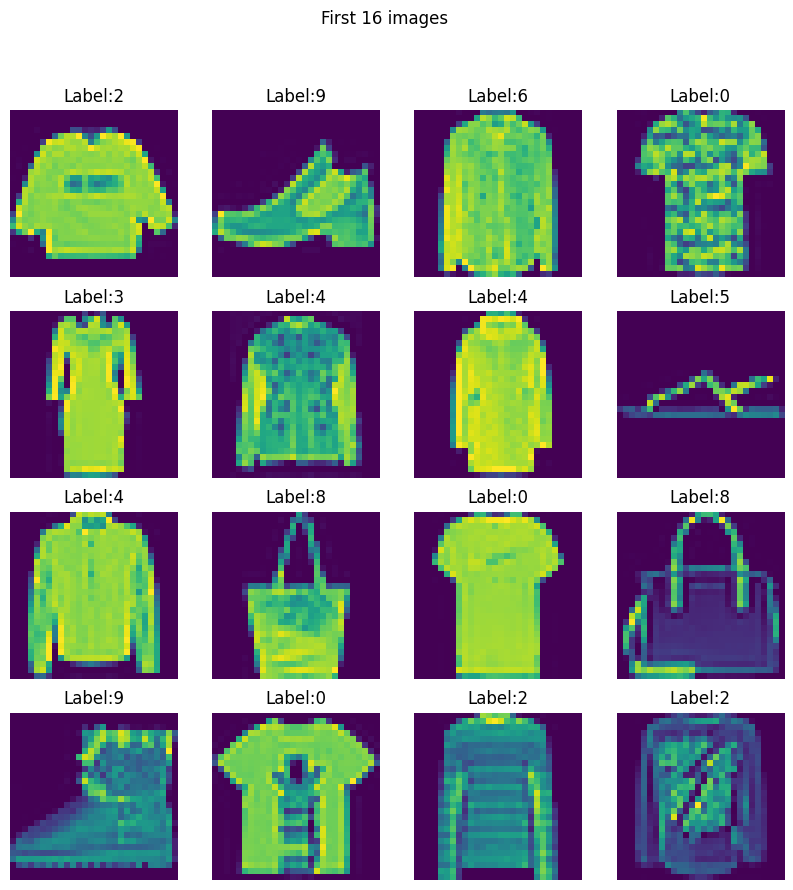

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images")
for i, ax in enumerate(axes.flat):
   img = df.iloc[i, 1:].values.reshape(28, 28)
   ax.imshow(img)
   ax.axis('off')
   ax.set_title(f"Label:{df.iloc[i, 0]}")
plt.show()

In [14]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train = X_train/255.0
X_test = X_test/255.0

np.float64(0.0)

In [22]:
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype=torch.long)
  def __len__(self):
    return len(self.features)
  def __getitem__(self,idx):
    return self.features[idx],self.labels[idx]

In [26]:
train_dataset = CustomDataset(X_train,y_train)


In [27]:
test_dataset = CustomDataset(X_test,y_test)

In [28]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [34]:
class MyNeuralNetwork(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
  def forward(self,x):
    return self.model(x)


In [31]:
epochs = 100
llr = 0.1

In [35]:
model = MyNeuralNetwork(X_train.shape[1])
criterian = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=llr)

In [36]:
for epoch in range(epochs):
  for batch_features, batch_labels in train_loader:
    outputs = model(batch_features)
    loss = criterian(outputs,batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

Epoch 1/100, Loss: 0.3978462815284729
Epoch 2/100, Loss: 0.34619462490081787
Epoch 3/100, Loss: 0.39120572805404663
Epoch 4/100, Loss: 0.48474541306495667
Epoch 5/100, Loss: 0.2529602646827698
Epoch 6/100, Loss: 0.2845483124256134
Epoch 7/100, Loss: 0.329852432012558
Epoch 8/100, Loss: 0.1449202597141266
Epoch 9/100, Loss: 0.13549020886421204
Epoch 10/100, Loss: 0.3553909361362457
Epoch 11/100, Loss: 0.23667941987514496
Epoch 12/100, Loss: 0.3051280081272125
Epoch 13/100, Loss: 0.2690965533256531
Epoch 14/100, Loss: 0.30091628432273865
Epoch 15/100, Loss: 0.22954019904136658
Epoch 16/100, Loss: 0.3099841773509979
Epoch 17/100, Loss: 0.13254350423812866
Epoch 18/100, Loss: 0.19423243403434753
Epoch 19/100, Loss: 0.06157979369163513
Epoch 20/100, Loss: 0.21111269295215607
Epoch 21/100, Loss: 0.26216158270835876
Epoch 22/100, Loss: 0.16345426440238953
Epoch 23/100, Loss: 0.25149422883987427
Epoch 24/100, Loss: 0.28566980361938477
Epoch 25/100, Loss: 0.31244298815727234
Epoch 26/100, Loss:

In [37]:
model.eval()

MyNeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [38]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _,predicted = torch.max(outputs.data,1)
    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()
accuracy = correct/total

In [39]:
accuracy

0.89125